In [8]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Display settings
%matplotlib inline
np.set_printoptions(precision=4, suppress=True)




In [9]:
# Extract zip
!unzip -q /content/data.zip -d /content/dataset

[/content/dataYahya.zip]
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of /content/dataYahya.zip or
        /content/dataYahya.zip.zip, and cannot find /content/dataYahya.zip.ZIP, period.


In [4]:
input_folder = "/content/dataset/newDataset"
output_folder = "/content/drive/MyDrive/datasets"

In [7]:

os.makedirs(output_folder, exist_ok=True)

# Resize to 20x32
for filename in os.listdir(input_folder):
    if filename.lower().endswith((".jpg", ".png", ".jpeg", ".bmp", ".gif")):
        input_path = os.path.join(input_folder, filename)
        output_path = os.path.join(output_folder, filename)

        try:
            with Image.open(input_path) as img:
                img = img.resize((20, 32))
                img.save(output_path)
                print(f"✔ Saved: {output_path}")
        except Exception as e:
            print(f"✖ Failed: {filename}, Error: {e}")


FileNotFoundError: [Errno 2] No such file or directory: '/content/dataset/newDataset'

In [ ]:
!mv /content/datasets /content/drive/MyDrive

In [ ]:
x_data, y_data = [], []
image_paths = glob.glob(f"{output_folder}/*.jpg")

for path in image_paths:
    label_char = os.path.basename(path)[0]
    label = 10 if label_char == "N" else int(label_char)

    img = Image.open(path)
    img_array = np.array(img, dtype=np.float32)

    x_data.append(img_array)
    y_data.append(label)

x_data = np.array(x_data)
y_data = to_categorical(np.array(y_data), num_classes=10)

# Shuffle
x_data, y_data = shuffle(x_data, y_data)

print("x_data shape:", x_data.shape)
print("y_data shape:", y_data.shape)


x_data shape: (6500, 32, 20, 3)
y_data shape: (6500, 10)


In [ ]:
Training_Percentage = 0.0  # Set to 0.0 for all data used for training

if Training_Percentage > 0:
    X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=Training_Percentage)
else:
    X_train, y_train = x_data, y_data


In [ ]:
input_layer = tf.keras.Input(shape=(32, 20, 3))
x = tf.keras.layers.BatchNormalization()(input_layer)
x = tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu')(x)
x = tf.keras.layers.MaxPool2D(2)(x)
x = tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu')(x)
x = tf.keras.layers.MaxPool2D(2)(x)
x = tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu')(x)
x = tf.keras.layers.MaxPool2D(2)(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
output = tf.keras.layers.Dense(10, activation='softmax')(x)

model = tf.keras.Model(inputs=input_layer, outputs=output)
model.compile(optimizer=tf.keras.optimizers.Adadelta(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 20, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 20, 3)      │            12 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 20, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 10, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 10, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 5, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 2, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 87,766 (342.84 KB)

 Trainable params: 87,760 (342.81 KB)

 Non-trainable params: 6 (24.00 B)

In [ ]:
datagen = ImageDataGenerator(
    width_shift_range=1,
    height_shift_range=1,
    brightness_range=[0.8, 1.2],
    zoom_range=0.3,
    rotation_range=5
)

batch_size = 4
epochs = 100

train_generator = datagen.flow(X_train, y_train, batch_size=batch_size)

if Training_Percentage > 0:
    val_generator = datagen.flow(X_test, y_test, batch_size=batch_size)
    history = model.fit(train_generator, validation_data=val_generator, epochs=epochs)
else:
    history = model.fit(train_generator, epochs=epochs)


Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1625/1625 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.0837 - loss: 2.3084
Epoch 2/100
1625/1625 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.1391 - loss: 2.2817
Epoch 3/100
1625/1625 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.1753 - loss: 2.2636
Epoch 4/100
1625/1625 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.1970 - loss: 2.2520
Epoch 5/100
1625/1625 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.2044 - loss: 2.2382
Epoch 6/100
1625/1625 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.2017 - loss: 2.2275
Epoch 7/100
1625/1625 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.1949 - loss: 2.2207
Epoch 8/100
1625/1625 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.1994 - loss: 2.2157
Epoch 9/100
1625/1625 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.2040 - loss: 2.2058
Epoch 10/100
1625/1625 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.1986 - loss: 2.2057
Epoch 11/100
1625/1625 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.2098 - loss: 2.1946
Epoch 12/100
1625/1625 

In [ ]:
model.export("test")  # ✅ for TFLite export
print("✔ Model exported to 'test'")


Saved artifact at 'test'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 32, 20, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  137321831206736: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137321831206352: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137321831205584: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137321831204432: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137321831207504: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137321831207888: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137321831208848: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137321831209040: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137321831208272: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137321831209232: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137321831206160: TensorSpec

In [ ]:
from pathlib import Path
import tensorflow as tf

# Optional: define a representative dataset for quantization
def representative_dataset():
    for i in range(min(100, len(X_train))):
        yield [X_train[i:i+1]]

# 📦 Quantized model
quant_model_path = "4TrainedModel.tflite"
converter = tf.lite.TFLiteConverter.from_saved_model("test")
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_dataset
converter._experimental_disable_per_channel_quantization_for_dense_layers = True  # Optional
tflite_quant_model = converter.convert()
Path(quant_model_path).write_bytes(tflite_quant_model)

print("✅ Quantized TFLite saved:", quant_model_path)
print("📦 Size:", Path(quant_model_path).stat().st_size, "bytes")


✅ Quantized TFLite saved: 4TrainedModel.tflite
📦 Size: 96944 bytes


In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from PIL import Image

# Load the TFLite model once
interpreter = tf.lite.Interpreter(model_path="5TrainedModel.tflite")  # or "NoQuantization.tflite"
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Function to preprocess a single image
def preprocess_image(image_path):
    img = Image.open(image_path).convert("RGB").resize((20, 32))
    img_array = np.array(img, dtype=np.float32)
    # If your model was trained with normalization, uncomment the next line
    # img_array /= 255.0
    return np.expand_dims(img_array, axis=0), img

# Function to predict and plot
def predict_and_plot(image_path):
    input_data, original_img = preprocess_image(image_path)

    # Set input and run inference
    interpreter.set_tensor(input_details[0]['index'], input_data)
    interpreter.invoke()
    output_data = interpreter.get_tensor(output_details[0]['index'])[0]

    predicted_class = np.argmax(output_data)
    confidence = output_data[predicted_class]

    # Plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

    # Display image
    ax1.imshow(original_img)
    ax1.axis("off")
    ax1.set_title(f"Predicted: {predicted_class} ({confidence:.2%})")

    # Display bar chart
    ax2.bar(range(10), output_data, color="skyblue")
    ax2.set_xticks(range(10))
    ax2.set_ylim(0, 1)
    ax2.set_title("Prediction Probabilities")
    ax2.set_ylabel("Confidence")

    plt.tight_layout()
    plt.show()


In [ ]:
!pip install ai-edge-litert


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 MB 10.4 MB/s eta 0:00:00


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (10,) and arg 1 with shape (11,).

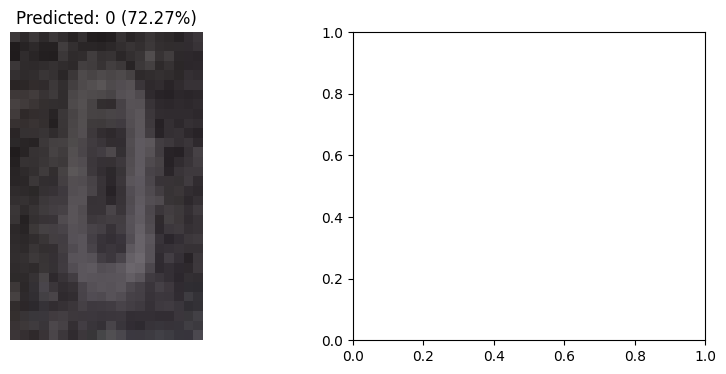

In [ ]:
predict_and_plot("/content/0.jpg")

/usr/local/lib/python3.12/dist-packages/tensorflow/lite/python/interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


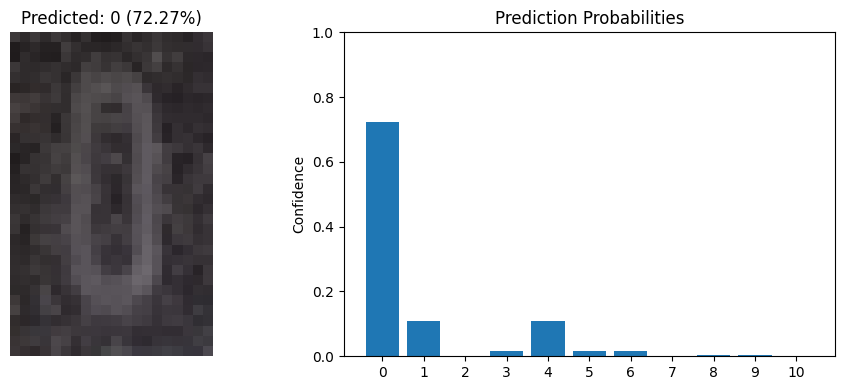

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from PIL import Image

# Load the TFLite model once
interpreter = tf.lite.Interpreter(model_path="5TrainedModel.tflite")
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# -----------------------------
# Image preprocessing function
# -----------------------------
def preprocess_image(image_path):
    img = Image.open(image_path).convert("RGB").resize((20, 32))
    img_array = np.array(img, dtype=np.float32)

    # Uncomment ONLY if your model was trained with normalization
    # img_array /= 255.0

    img_array = np.expand_dims(img_array, axis=0)
    return img_array, img


# -----------------------------
# Prediction + visualization
# -----------------------------
def predict_and_plot(image_path):
    input_data, original_img = preprocess_image(image_path)

    # Run inference
    interpreter.set_tensor(input_details[0]['index'], input_data)
    interpreter.invoke()

    output_data = interpreter.get_tensor(output_details[0]['index'])[0]

    predicted_class = np.argmax(output_data)
    confidence = output_data[predicted_class]

    num_classes = len(output_data)

    # Plot results
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

    # Show image
    ax1.imshow(original_img)
    ax1.axis("off")
    ax1.set_title(f"Predicted: {predicted_class} ({confidence:.2%})")

    # Bar chart (FIXED)
    ax2.bar(range(num_classes), output_data)
    ax2.set_xticks(range(num_classes))
    ax2.set_ylim(0, 1)
    ax2.set_title("Prediction Probabilities")
    ax2.set_ylabel("Confidence")

    plt.tight_layout()
    plt.show()


# -----------------------------
# Run test
# -----------------------------
predict_and_plot("/content/0.jpg")
